In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

    gpu_gpu_0
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7          0%
8          0%
9          0%
10         0%
11         0%
12         0%
13         0%
14         0%
15         0%
16         0%
17         0%
18         0%
19         0%
20         0%
21         0%
22         0%
23         0%
24         0%
25         0%
26         0%
27         0%
28         0%
29         0%
30         0%
31         0%
32         0%
33         0%
34         0%
35         0%
36         0%
37         0%
38         0%
39         0%
40         0%
41         0%
42         0%
43         0%
44         0%
45         0%
46         0%
47         0%
48         0%
49         0%
50         0%
51         0%
52         0%
53         0%
54         0%
55         0%
56         0%
57         0%
58         0%
59         0%
60         0%
61         0%
62         0%
63         0%
64         0%
65         0%
66         0%
67         0%
68         0%
69         0%
70    

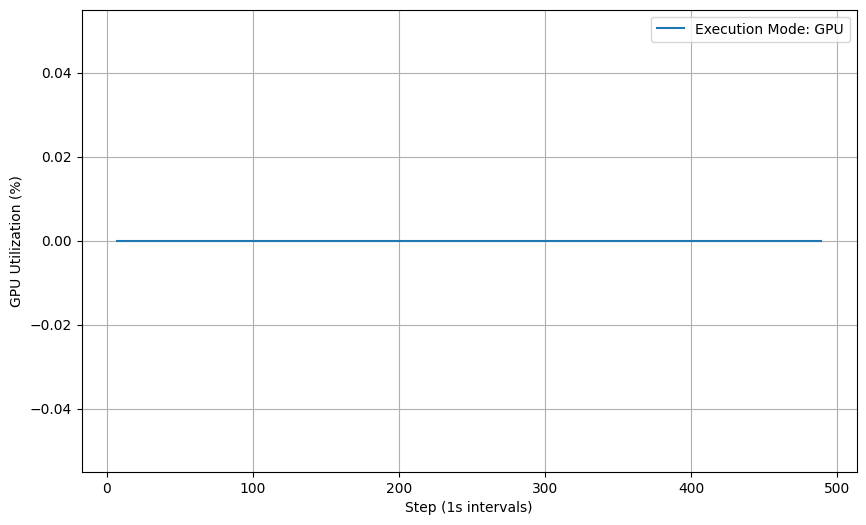

In [3]:
# GPU Utilization GPU
pd.set_option("display.max_rows", None)

# Load all CSV files
csv_files_gpu = glob.glob("./data/gpu/*resources.csv")

dfs_gpu = [pd.read_csv(file, usecols=["gpu_gpu_0"]) for file in csv_files_gpu]

# clean
for i, df in enumerate(dfs_gpu):
    print(df)
    dfs_gpu[i]["gpu_gpu_0"] = (
        df["gpu_gpu_0"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .replace("", 0)
        .astype(float)
    )


combined_gpu = pd.concat(dfs_gpu, axis=1)
print(combined_gpu)
# combined_gpu.fillna(0)

means_gpu = combined_gpu.mean(axis=1)

plt.figure(figsize=(10,6))

plt.plot(means_gpu.index, means_gpu, marker=",", label="Execution Mode: GPU")

plt.xlabel("Step (1s intervals)")
plt.ylabel("GPU Utilization (%)")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Export to csv

df_lines = pd.DataFrame({
    "GPU": means_gpu,
})

# Save to CSV
df_lines.to_csv("gpu.csv", index_label="Index")

